<h1>Problema Knapsack<h1>



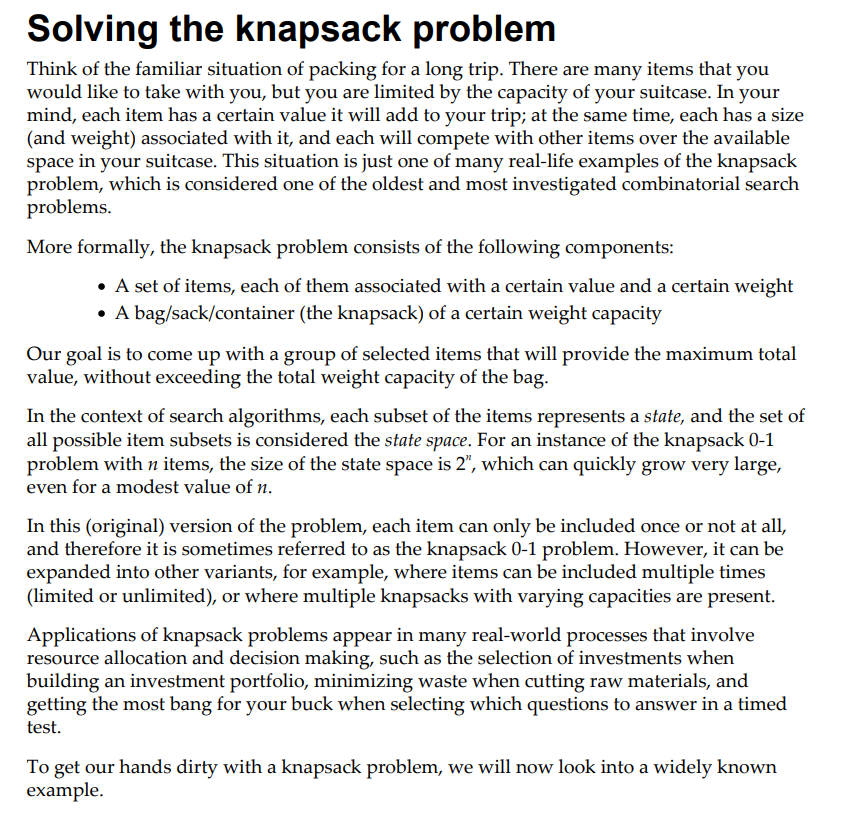

In [1]:
!pip install deap
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from deap import creator, base, tools, algorithms
import random as rd
import numpy as np

# STRUCTURE
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("chromosomeStruct", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()


# CHROMOSOME [ 1 0 1 0 1 1 ...] lista binaria
CHROMOSOME_LENGTH = 22
def gene():
  return rd.randint(0,1)
toolbox.register("chromosome", tools.initRepeat, creator.chromosomeStruct, gene, CHROMOSOME_LENGTH)
toolbox.register("individual", toolbox.chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.individual)


# GENETIC OPERATORS
def fitness_function(individual, WEIGHT_LIMIT=400):
  
    items = [
        ("map", 9, 150),
        ("compass", 13, 35),
        ("water", 153, 200),
        ("sandwich", 50, 160),
        ("glucose", 15, 60),
        ("tin", 68, 45),
        ("banana", 27, 60),
        ("apple", 39, 40),
        ("cheese", 23, 30),
        ("beer", 52, 10),
        ("suntan cream", 11, 70),
        ("camera", 32, 30),
        ("t-shirt", 24, 15),
        ("trousers", 48, 10),
        ("umbrella", 73, 40),
        ("waterproof trousers", 42, 70),
        ("waterproof overclothes", 43, 75),
        ("note-case", 22, 80),
        ("sunglasses", 7, 20),
        ("towel", 18, 12),
        ("socks", 4, 50),
        ("book", 30, 10)
        ]
    weight = 0
    value = 0
    index = 0
    for i in individual:
        if i == 1:
            weight += int(items[index][1])
            value += int(items[index][2])
        index += 1
    if weight >= WEIGHT_LIMIT:
        return 0, # Retornar uma tupla
    else:
        return value, # Retornar uma tupla
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/CHROMOSOME_LENGTH)

# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
stats.register("std", np.std)
hof = tools.HallOfFame(10)


# CONTROL PANEL
POPULATION_SIZE = 100
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 100 # (stopping condition)
rd.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=PROBABILITY_CROSSOVER,
                                  mutpb=PROBABILITY_MUTATION,
                                  stats=stats,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'chromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max	min	mean  	std    
0  	100   	770	0  	222.45	269.419
1  	87    	790	0  	380.59	282.627
2  	85    	797	0  	447.94	280.949
3  	79    	827	0  	585.13	212.721
4  	83    	840	0  	566.7 	285.013
5  	86    	952	0  	604.88	268.183
6  	76    	952	0  	690.37	229.458
7  	74    	952	0  	675.81	278.507
8  	90    	952	0  	673.96	301.854
9  	75    	952	0  	702.4 	291.896
10 	83    	952	0  	734.53	288.275
11 	85    	952	0  	717.21	327.017
12 	87    	952	0  	654.03	379.603
13 	87    	952	0  	675.15	372.263
14 	84    	952	0  	710.04	350.944
15 	86    	952	0  	778.46	319.698
16 	81    	982	0  	834.33	282.513
17 	88    	982	0  	894.98	208.097
18 	77    	982	0  	826.77	319.953
19 	81    	982	0  	813.57	330.008
20 	85    	982	0  	862.77	273.19 
21 	83    	982	0  	835.92	311.611
22 	83    	982	0  	775.42	377.207
23 	80    	982	0  	808.28	355.167
24 	79    	982	0  	909.46	234.113
25 	85    	982	0  	901.41	250.495
26 	81    	982	0  	887.22	280.364
27 	87    	982	0  	942.15	170.608
28 	77    	982

In [35]:
population[0]

[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]

In [36]:
hof[0]

[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]

<h1>Visualizações<h1>

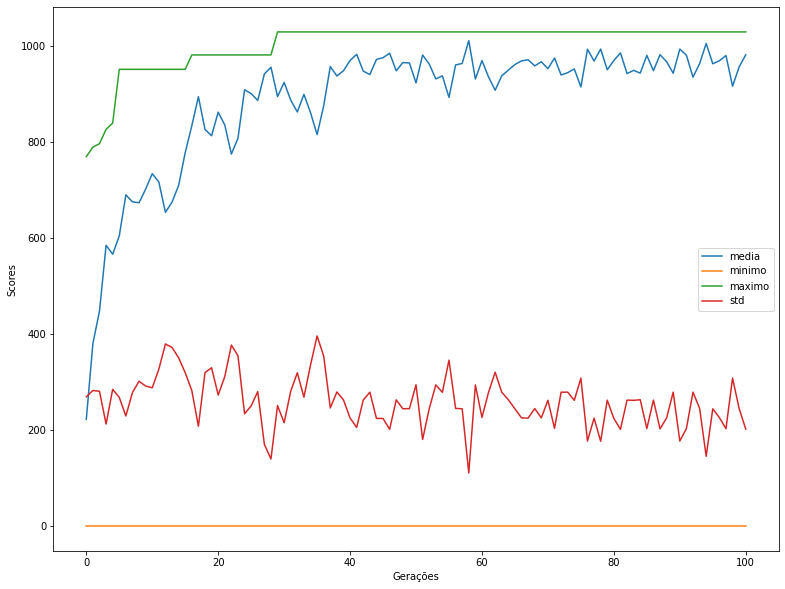

In [40]:
import matplotlib.pyplot as plt

# taking data
y_mean = log.select("mean")
y_min = log.select("min")
y_max = log.select("max")
y_std = log.select("std")
x_gen = log.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")
plt.plot(x_gen, y_std, label="std")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)